# Аналитика в Яндекс.Афише

Проходя стажировку в отделе аналитики Яндекс.Афиши необходимо помочь маркетологам оптимизировать маркетинговые затраты.

В нашем распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сервиса Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов.

В процессе работы, загрузив и предобработав данные, мы изучим: как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент и когда клиент окупается.  

Исходя из вышесказанного разделим данное исследование на несколько частей.

[Часть 1. Изучение общей информации](#1.) 
* [1.1. Загрузка библиотек, импорт файлов с данными](#1.1.)
* [1.2. Изучение общей информации о данных](#1.2.)
* [1.3. Преобразование типа данных](#1.3.)

[Часть 2. Анализ бизнес-показателей](#2.)
* [2.1. Анализ продукта: количество посетителей Яндекс.Афиши в день, неделю, месяц](#2.1.)
* [2.2. Анализ продукта: количество сессий в день](#2.2.)
* [2.3. Анализ продукта: средняя продолжительность сессии](#2.3.)
* [2.4. Анализ продукта: частота возвращений пользователей](#2.4.)
* [2.5. Анализ продаж: когда пользователи начинают покупать](#2.5.)
* [2.6. Анализ продаж: количество покупок за период](#2.6.)
* [2.7. Анализ продаж: средний чек](#2.7.)
* [2.8. Анализ продаж: прибыль, которую приносит пользователь за все время](#2.8.)
* [2.9.  Анализ маркетинга: общие затраты/на каждый источник/по времени](#2.9.)
* [2.10. Анализ маркетинга: стоимость привлечения одного покупателя из каждого источника](#2.10.)
* [2.11. Анализ маркетинга: окупаемость расходов](#2.11.)

В завершении сделаем выводы по проделанной работе и дадим рекомендации маркетологам, куда и сколько им стоит вкладывать денег?

### Часть 1. Изучение общей информации

В данной части анализа загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

#### 1.1. Загрузка библиотек, импорт файлов с данными <a id='1.1.'></a> 

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Прочитаем данные visits_log методом read_csv и посмотрим на исхдный датафейм
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
# Прочитаем данные orders_log методом read_csv и посмотрим на исхдный датафейм
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [4]:
# Прочитаем данные costs методом read_csv и посмотрим на исхдный датафейм
costs = pd.read_csv('/datasets/costs.csv')
costs.sample(5)

,source_id,dt,costs
1794,5,2018-05-10,99.69
1200,4,2017-09-20,51.30
1491,5,2017-07-10,100.74
416,2,2017-07-24,62.56
172,1,2017-11-20,77.10


#### 1.2. Изучение общей информации о данных <a id='1.2.'></a>

Рассмотрим более подробно общую информацию о датафрейме visits, его признаки и их типы.

In [5]:
# Посмотрим общую информацию о датафрейме visits, воспользовавшись методом info
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [6]:
# Проверим данные датафрейма visits на наличие дубликатов, вызвав метод duplicated()
print('Количество дубликатов в данных:', visits.duplicated().sum())

Количество дубликатов в данных: 0


Данные датафрейма visits - это предоставленный лог сервера с информацией о 359400 посещениях сервиса Яндекс.Афиша пользователями и отражающий идентификатор пользователя, категорию устройства пользователя, с которого он посещал сайт, дату и время начала/окончания сессии и идентификатор рекламного источника, из которого пришел пользователь.  

Пропусков и дубликатов записей в датафрейме обнаружено не было. Однако, для дальнейшей работы с данными потребуется привести показатели времени - дата и время начала/окончания сессии - к формату даты, а названия столбцов - к единому регистру.

Рассмотрим более подробно общую информацию о датафрейме orders, его признаки и их типы.

In [7]:
# Посмотрим общую информацию о датафрейме orders, воспользовавшись методом info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
# Проверим данные датафрейма orders на наличие дубликатов, вызвав метод duplicated()
print('Количество дубликатов в данных:', orders.duplicated().sum())

Количество дубликатов в данных: 0


Данные датафрейма orders - это выгрузка всех заказов за период с июня 2017 по конец мая 2018 года. В каждой из 50415 строк данных содержится информация о конкретном заказе: id пользователя, который сделал заказ, дата и время заказа и выручка Яндекс.Афиши с этого заказа.  

Пропусков и дубликатов данные не содержат, но для дальнейшей работы необходимо будет перевести показатель времени совершения заказа к типу даты, названия столбцов - к единому регистру.

Рассмотрим более подробно общую информацию о датафрейме costs, его признаки и их типы.

In [9]:
# Посмотрим общую информацию о датафрейме costs, воспользовавшись методом info
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [10]:
# Рассмотрим основные статистические характеристики данных датафрейма costs по каждому числовому признаку методом describe 
costs.describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
source_id,2542,4.8572,3.18158,1,2,4,9,10
costs,2542,129.477,156.297,0.54,21.945,77.295,170.065,1788.28


In [11]:
# Проверим данные датафрейма costs на наличие дубликатов, вызвав метод duplicated()
print('Количество дубликатов в данных:', costs.duplicated().sum())

Количество дубликатов в данных: 0


Датафрейм costs содержит информацию о затратах на маркетинг - 2542 строк по 10 идентификаторам рекламного источника, дате и затратам на конкретный рекламный источник в конкретный день.  
Пропусков и дубликатов датафрейм не содержит, но в дальнейшем тип данных object в показатели даты заменим на формат datetime.

#### 1.3. Преобразование типа данных <a id='1.3.'></a>

Для большего удобства работы с данными приведем названия всех столбцов датафреймов visits и orders к единому регистру.

In [12]:
# Приведем названия столбцов датафрейма visits к нижнему регистру
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [13]:
# Приведем названия столбцов датафрейма orders к нижнему регистру
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


В датафреймах visits, orders и costs приведем данные, содержащие информацию о времени, из типа object к формату даты. 

In [14]:
# Приведем типы данных "start ts" и "end_ts" датафрейма visits к формату даты 
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')

# Проверим полученный результат
visits.dtypes

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

In [15]:
# Приведем типы данных "buy_ts"  датафрейма orders к формату даты 
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')

# Проверим полученный результат
orders.dtypes

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

In [16]:
# Приведем типы данных "dt"  датафрейма costs к формату даты 
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d %H:%M:%S')

# Проверим полученный результат
costs.dtypes

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

### Часть 2. Анализ бизнес-показателей

На данном этапе анализа построим отчёты и посчитаем следующие метрики:
* Продукт: cколько людей пользуются в день, неделю, месяц? Сколько сессий в день? Сколько длится одна сессия? Как часто люди возвращаются?
* Продажи: когда люди начинают покупать? Сколько раз покупают за период? Какой средний чек? Сколько денег приносят?
* Маркетинг: cколько денег потратили (всего / на каждый источник / по времени)? Сколько стоило привлечение одного покупателя из каждого источника? На сколько окупились расходы?  

Наглядно покажем, построив графики, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

#### 2.1. Анализ продукта: количество посетителей Яндекс.Афиши в день, неделю, месяц<a id='2.1.'></a>

Изучим более подробно пользовательскую активность в трех измерениях: количество уникальных пользователей в день/неделю/месяц. Добавим полученные значения в новые столбцы датафрейма.

In [17]:
# Выделим в отдельные столбцы год, месяц и неделю, а также полную дату
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

# Проверим полученный результат
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [18]:
# Посчитаем метрики, сгруппировав данные по уникальным пользователям и найдём среднее
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print('Количество уникальных пользователей в день:', int(dau))
print('Количество уникальных пользователей в неделю:',int(wau)) 
print('Количество уникальных пользователей в месяц:', int(mau)) 

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


Наблюдаемая положительная динамика количества активных пользователей в рамках дня/недели/месяца косвенно указывает на его успешность.

#### 2.2.  Анализ продукта: количество сессий в день<a id='2.2.'></a>

Узнаем о регулярности использования сервиса Яндекс.Афиша, изучив сколько сессий приходится на одного пользователя в день.

In [19]:
# Посчитаем среднее количество сессий на одного пользователя в день
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['count_sessions', 'unique_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['count_sessions'] / sessions_per_user['unique_users']

print('Количество сессий, которое в среднем совершает пользователь в день: {:.2f}'.format(sessions_per_user['sessions_per_user'].mean()))

Количество сессий, которое в среднем совершает пользователь в день: 1.08


Исходя из того, что один пользователь в среднем в день проводит на сайте 1 сессию, можно сказать, что продукт используется регулярно.

#### 2.3.  Анализ продукта: средняя продолжительность сессии <a id='2.3.'></a>

Узнав среднюю продолжительность сессии можно будет понять, насколько интересно пользователю проводить время на сайте Яндекс.Афиши. 

In [20]:
# Посчитаем среднее арифметическое всех длин сессий за временной интервал
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
print('Cредняя продолжительность сессии: {:.0f} сек.'.format(visits['session_duration_sec'].mean()))

Cредняя продолжительность сессии: 643 сек.


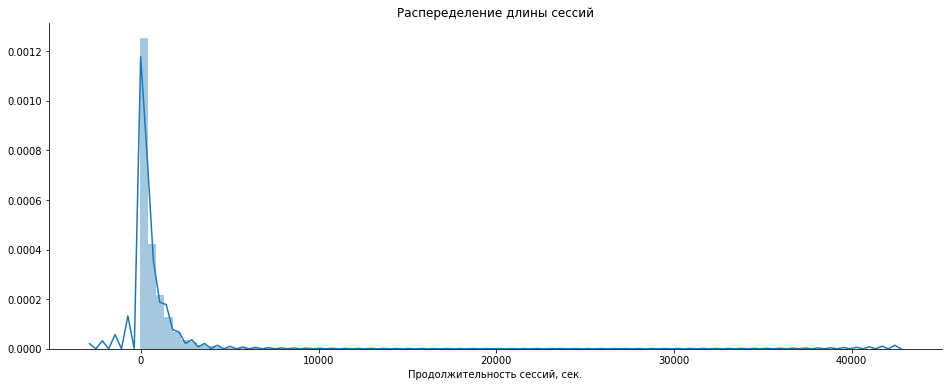

In [21]:
# Построив график, посмотрим на распределение 
plt.figure(figsize=(16, 6))
sns.distplot(visits['session_duration_sec'], bins=100, )
sns.despine()
plt.title('Распеределение длины сессий')
plt.xlabel("Продолжительность сессий, сек.")
plt.show()

Длина сессии распределена неравномерно, поэтому при расчете средней продолжительности сессии будем учитывать моду - значение в выборке, которое встречается чаще всего.

In [22]:
# Найдем моду продолжительности пользовательской сессии
asl = visits['session_duration_sec'].mode()
print(asl)

0    60.0
dtype: float64


Продолжительность большей части сессий - около 1 минуты. Фактически, пользователи заходят на сайт и сразу с него уходят, но, учитывая то, что сервис предназначен для поиска мероприятий и продажи билетов, к тому же, присутствует автоматическая система рекомендаций, этого времени достаточно, чтобы ознакомиться с мероприятиями, сделать выбор или приобрести билет. 

#### 2.4.  Анализ продукта: частота возвращений пользователей <a id='2.4.'></a>

Чтобы оценить привлекательность сервиса Яндекс.Афиша для пользователей, обратимся к метрике - коэффициент удержания. Иными словами, узнаем сколько пользователей осталось с нами за период времени с июня 2017 по конец мая 2018 года.

In [23]:
# Найдем дату, когда пользователь впервые проявил активность в сервисе
first_activity = visits.groupby(['uid'])['start_ts'].min()
first_activity.name = 'first_activity'
first_activity.head().reset_index()

,uid,first_activity
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [24]:
# Методом join() объединим Series first_activity с датафреймом visits 
visits = visits.join(first_activity, on='uid') 
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440.0,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.0,2017-12-27 14:06:00


In [25]:
# Преобразуйем столбцы с датой start_ts и first_activity к первому дню месяца
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity'].astype('datetime64[M]')
visits.sample(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity,activity_month,first_activity_month
85758,desktop,2017-08-12 23:52:00,5,2017-08-12 23:44:00,10606096705960831751,2017,8,32,2017-08-12,480.0,2017-08-12 23:44:00,2017-08-01,2017-08-01
147189,touch,2017-11-19 19:17:00,4,2017-11-19 19:14:00,13152371124013344896,2017,11,46,2017-11-19,180.0,2017-11-19 19:14:00,2017-11-01,2017-11-01
109889,desktop,2018-03-24 19:35:00,1,2018-03-24 19:10:00,7242306430963598513,2018,3,12,2018-03-24,1500.0,2018-01-25 22:37:00,2018-03-01,2018-01-01
240126,desktop,2018-03-02 22:44:00,3,2018-03-02 22:32:00,8579606043500099293,2018,3,9,2018-03-02,720.0,2018-03-02 22:32:00,2018-03-01,2018-03-01
324309,touch,2018-04-08 18:33:00,4,2018-04-08 18:32:00,14134705681965286935,2018,4,14,2018-04-08,60.0,2018-02-13 17:57:00,2018-04-01,2018-02-01


In [26]:
# Для каждой строки датафрейма рассчитаем "время жизни" пользователя в рамках когорты
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
visits.sample(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_activity,activity_month,first_activity_month,cohort_lifetime
96614,desktop,2017-07-21 13:38:00,4,2017-07-21 13:14:00,1948868365664284579,2017,7,29,2017-07-21,1440.0,2017-07-21 13:14:00,2017-07-01,2017-07-01,0
193745,desktop,2017-09-15 10:22:00,10,2017-09-15 10:20:00,3274897727005094502,2017,9,37,2017-09-15,120.0,2017-09-14 14:21:00,2017-09-01,2017-09-01,0
165239,touch,2018-02-07 19:05:00,5,2018-02-07 18:47:00,5438434765917465924,2018,2,6,2018-02-07,1080.0,2018-02-07 18:47:00,2018-02-01,2018-02-01,0
203664,desktop,2018-02-12 17:43:00,3,2018-02-12 17:41:00,9089763728590068579,2018,2,7,2018-02-12,120.0,2018-02-12 17:41:00,2018-02-01,2018-02-01,0
210016,desktop,2017-11-21 10:42:00,4,2017-11-21 10:37:00,17509342290984013707,2017,11,47,2017-11-21,300.0,2017-11-21 10:37:00,2017-11-01,2017-11-01,0


In [27]:
# Сгруппируем данные по когортам и для каждой посчитаем количество активных пользователей на определённый месяц
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [28]:
# Для каждой когорты отразим число пользователей на нулевой месяц "жизни"
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [29]:
# Объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count, on='first_activity_month') 

In [30]:
# Найдем коэффициент удержания
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [31]:
# Рассмотрим детально retention rate, создав сводную таблицу
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum') 
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


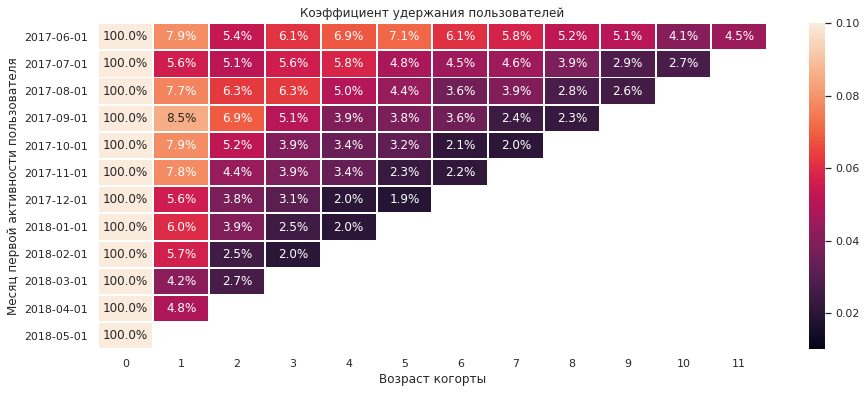

In [32]:
# Визуализируем данные, создав тепловую карту при помощи метода heatmap() 
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Коэффициент удержания пользователей')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='white', vmin=0.01, vmax=0.1)
ax.set_yticklabels(retention_pivot.index.date)
ax.set_xlabel('Возраст когорты')
ax.set_ylabel('Месяц первой активности пользователя')
plt.show()

Отметим, что в целом коэффициент удержания пользователей изначально довольно низкий и убывает с течением времени.  
Если для когорты пользователей, пришедших в июне 2017 года Retention Rate в первую неделю составлял 7,9%, то для пользователей, пришедших, например, в январе 2018 — уже 5,6%. Так, за полгода коэффициент удержания упал на 2,3%, что довольно ощутимо, учитывая и так невысокие показатели данной метрики. Это говорит, что с каждой новой когортой поведение пользователей меняется в отрицательную для нас сторону.  
Если рассматривать поведение пользователей в рамках второго и последующих месяцев пользования сервисом, то с течение времени этот показатель также начинает сильно падать - примерно до 2-3%.  
Данные выводы справедливы для всех когорт, кроме самой первой, коэффициент удержания которой тоже довольно низкий, но постоянно находится в "лидерах" по сравнению со всеми остальными когортами.

#### 2.5.  Анализ продаж: когда люди начинают покупать <a id='2.5.'></a>

Найдем время, которое требуется пользователю сервиса для осуществления заказа.

In [33]:
# Сгруппируем данные датафрейма orders, чтобы найти дату первого заказа
first_order = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order']

In [34]:
# Объединим данные Series first_activity и first_order при помощи метода merge()
order_buy = first_order.merge(first_activity, on='uid')
order_buy.head()

,uid,first_order,first_activity
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [35]:
# Найдем разницу во времени между датой, когда пользователь впервые проявил активность, и датой первого заказа
order_buy['time_diff_min'] = (order_buy['first_order'] - order_buy['first_activity']).dt.seconds / 60
print('Cредний временной интервал до совершения заказа пользователем: {:.0f} мин.'.format(order_buy['time_diff_min'].mean()))
print('Медианный временной интервал до совершения заказа пользователем: {:.0f} мин.'.format(order_buy['time_diff_min'].median()))

Cредний временной интервал до совершения заказа пользователем: 249 мин.
Медианный временной интервал до совершения заказа пользователем: 16 мин.


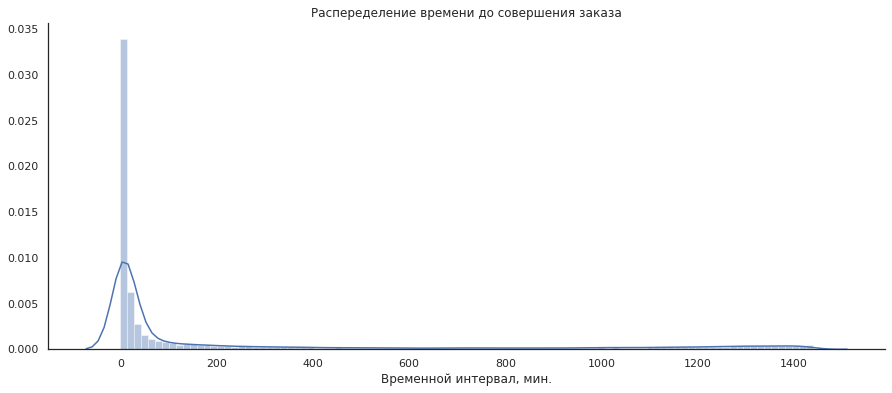

In [36]:
# Построив график, посмотрим на распределение 
plt.figure(figsize=(15, 6))
sns.distplot(order_buy['time_diff_min'], bins=100)
sns.despine()
plt.title('Распеределение времени до совершения заказа')
plt.xlabel('Временной интервал, мин.')
plt.show()

In [37]:
# Найдем моду временного интервала до совершения заказа
order_buy_mode = order_buy['time_diff_min'].mode()
order_buy_mode

0    1.0
dtype: float64

У большинства пользователей на оформление заказа уходит не более 1 минуты. Иными словами они заходят с уже конкретной и заранее известной целью.

#### 2.6.  Анализ продаж: количество покупок за период <a id='2.6.'></a>

Определим период - как месяц и на основании этого посмотрим на покупательское поведение пользователей. Для этого начнем с определения даты первой покупки каждого пользователя.

In [38]:
# Выделим месяцы из дат в таблицах с заказами 
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Найдем дату первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# Объединим series first_orders_month и датафрейм orders
first_order_month = pd.merge(orders,first_orders, on='uid')

# Изменим индексацию датафрейма orders
first_order_month.reset_index(inplace=True) 

# Выведем полученный датафрейм 
first_order_month.sample(5)

,index,buy_ts,revenue,uid,order_month,first_order_month
11939,11939,2017-09-21 20:47:00,1.94,2161940063598720365,2017-09-01,2017-09-01
10824,10824,2017-09-29 18:34:00,0.98,16645470360637068353,2017-09-01,2017-09-01
29462,29462,2017-12-24 11:34:00,11.00,16634077767953269092,2017-12-01,2017-12-01
46802,46802,2018-04-26 17:55:00,23.83,14732989905458287102,2018-04-01,2018-04-01
19297,19297,2017-10-31 13:12:00,27.50,7241987559206396236,2017-10-01,2017-10-01


In [39]:
# Добавим данные об источнике
first_source_id = visits.sort_values('start_ts').groupby('uid').agg({'source_id':'first'}).reset_index()
first_source_id.columns = ['uid', 'first_source_id']
orders = orders.merge(first_source_id, on='uid')
orders.head() 

,buy_ts,revenue,uid,order_month,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3


В полученный датафрем добавим столбец total_orders для каждой строки с покупкой. На данном этапе передадим нулевые значения этому параметру.

In [40]:
# Cоздадим столбец, в котором далее поместим количество заказов
first_order_month.insert(len(orders.columns), 'total_orders', 0, allow_duplicates = False)
first_order_month.head()

,index,buy_ts,revenue,uid,order_month,total_orders,first_order_month
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0,2017-06-01
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0,2017-06-01
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0,2017-06-01
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0,2017-06-01
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0,2017-06-01


Сгруппировав данные по первой покупке пользователя, узнаем в какую когорту он попадет, а также сделаем ряд вычислений - определим количество покупок по количеству элементов в месячном периоде и количество уникальных пользователей.

In [41]:
# Сгруппируем данные по когортам и для каждой посчитаем количество активных пользователей на определённый месяц
cohorts = first_order_month.groupby(['first_order_month','order_month']).agg({'uid':'nunique', 'total_orders': 'count'})
cohorts.rename(columns = {'uid': 'total_users'}, inplace = True)
cohorts.head(5)

total_users  total_orders
first_order_month order_month                           
2017-06-01        2017-06-01          2023          2354
                  2017-07-01            61           177
                  2017-08-01            50           174
                  2017-09-01            54           226
                  2017-10-01            88           292

Для большей наглядности и простоты расчетов упорядочим данные и добавим порядковое значение для каждого месячного периода.

In [42]:
# Добавим порядковое значение "времени жизни" для каждого периода
def cohort_lifetime(orders):
    orders['cohort_lifetime'] = np.arange(len(orders)) 
    return orders

cohorts = cohorts.groupby(level=0).apply(cohort_lifetime)
cohorts.head()

total_users  total_orders  cohort_lifetime
first_order_month order_month                                            
2017-06-01        2017-06-01          2023          2354                0
                  2017-07-01            61           177                1
                  2017-08-01            50           174                2
                  2017-09-01            54           226                3
                  2017-10-01            88           292                4

Сделаем расчет количества заказов, приходящихся на одного уникального пользователя сервиса. Рассмотрим данные более детально, построив сводную таблицу, и визуализируем полученные результаты.

In [43]:
# Посчитаем количество заказов на одного пользователя
cohorts['orders_per_person'] = cohorts['total_orders'] / cohorts.groupby('first_order_month')['total_users'].first()
cohorts.head(13)

total_users  total_orders  cohort_lifetime  \
first_order_month order_month                                               
2017-06-01        2017-06-01          2023          2354                0   
                  2017-07-01            61           177                1   
                  2017-08-01            50           174                2   
                  2017-09-01            54           226                3   
                  2017-10-01            88           292                4   
                  2017-11-01            67           218                5   
                  2017-12-01            62           276                6   
                  2018-01-01            47           174                7   
                  2018-02-01            58           212                8   
                  2018-03-01            45           153                9   
                  2018-04-01            45            96               10   
                  2018-05-01            53            86               11   
2017-07-01        2017-07-01          1923          2186                0   

                               orders_per_person  
first_order_month order_month                     
2017-06-01        2017-06-01            1.163618  
                  2017-07-01            0.087494  
                  2017-08-01            0.086011  
                  2017-09-01            0.111715  
                  2017-10-01            0.144340  
                  2017-11-01            0.107761  
                  2017-12-01            0.136431  
                  2018-01-01            0.086011  
                  2018-02-01            0.104795  
                  2018-03-01            0.075630  
                  2018-04-01            0.047454  
                  2018-05-01            0.042511  
2017-07-01        2017-07-01            1.136765

In [44]:
# Рассмотрим детально количество заказов, приходящихся на пользователя, создав сводную таблицу
orders_pivot = cohorts.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='orders_per_person',
    aggfunc = 'mean')

# orders_pivot['mean'] = orders_pivot.mean(axis=1)    
orders_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.144340,0.107761,0.136431,0.086011,0.104795,0.075630,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.012480,0.027561,NaN
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,NaN,NaN
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,NaN,NaN,NaN
2017-10-01,1.143779,0.072350,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,NaN,NaN,NaN,NaN
2017-11-01,1.179368,0.097280,0.044597,0.051703,0.033325,0.014457,0.024994,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,0.061602,0.046087,0.040840,0.019621,0.023956,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,0.066410,0.047139,0.018974,0.023125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,0.060805,0.022733,0.019173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


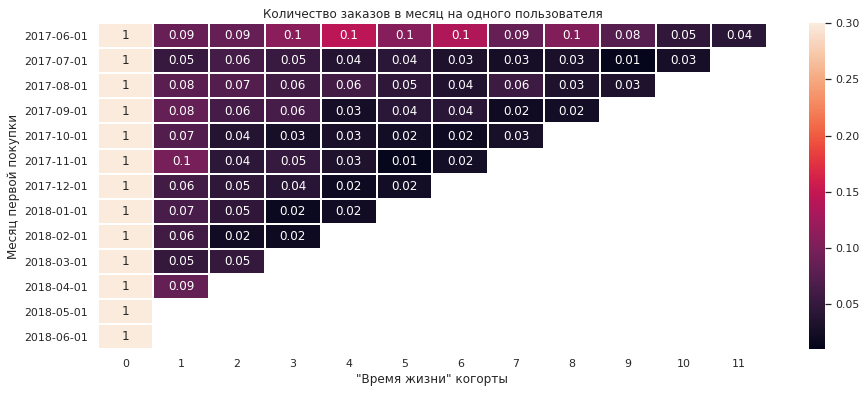

In [45]:
# Визуализируем данные, создав тепловую карту при помощи метода heatmap() 
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Количество заказов в месяц на одного пользователя')
ax = sns.heatmap(orders_pivot, annot=True, fmt='.0g', linewidths=1, linecolor='white', vmin=0.01, vmax=0.3)
ax.set_yticklabels(orders_pivot.index.date)
ax.set_xlabel('"Время жизни" когорты')
ax.set_ylabel('Месяц первой покупки')
plt.show()

Снова можем наблюдать отличие в поведении пользователей в первой когорте по количеству совершенных покупок  - в среднем 3 заказа в месяц, от показателей пользователей других когорт - в среднем 2 заказа в месяц.  
Довольно высокими показателями могут похвастаться также когорты марта и апреля. Так, второй месяц мартовской когорты показал 3 заказа на пользователя, а первый месяц апрельской - практически дотянул до 3 покупок.  
В целом же можно наблюдать тенденцию сокращения количества покупок с течением времени - до 1 заказа в месяц.

Далее рассмотрим поведение пользователей нарастающим итогом.

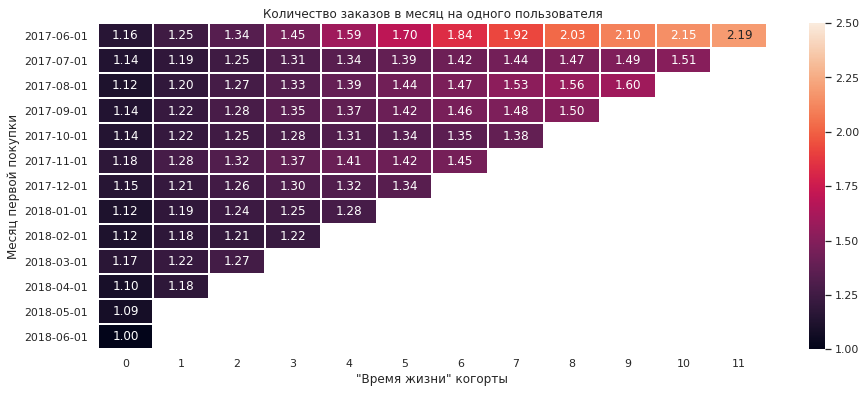

In [46]:
# Визуализируем данные, создав тепловую карту при помощи метода heatmap() 
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Количество заказов в месяц на одного пользователя')
ax = sns.heatmap(orders_pivot.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='white', vmin=1, vmax=2.5)
ax.set_yticklabels(orders_pivot.index.date)
ax.set_xlabel('"Время жизни" когорты')
ax.set_ylabel('Месяц первой покупки')
plt.show()

#### 2.7.  Анализ продаж: средний чек <a id='2.7.'></a>

Получим общее представление о том, сколько денег приносит один пользователь в течение отчетного периода после первой покупки.

In [47]:
# Найдем средний чек по каждому периоду, сгруппировав данные
avg_check = orders.groupby(['order_month']).agg({'revenue':'mean'}) 
avg_check.reset_index()

,order_month,revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280
5,2017-11-01,4.783518
6,2017-12-01,5.852139
7,2018-01-01,4.112927
8,2018-02-01,4.840095
9,2018-03-01,5.413930


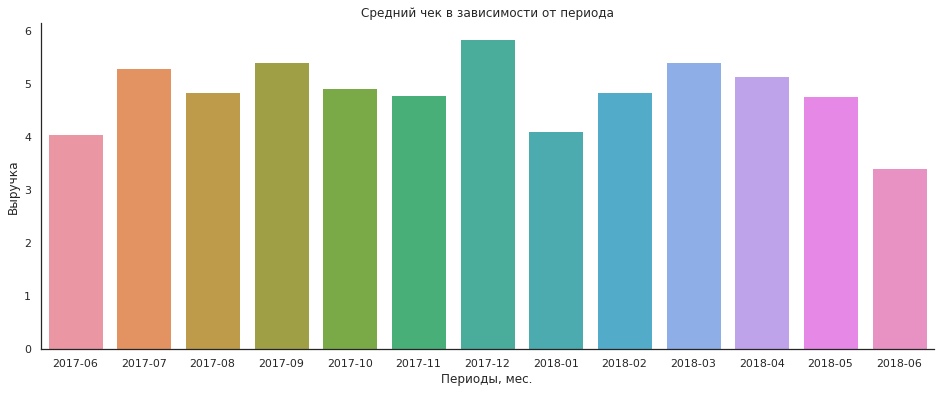

In [48]:
# Визуализируем данные, построив график
avg_check['order_month'] = avg_check.index
data_month = ['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06']

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='order_month', y='revenue', data=avg_check)
sns.despine()
ax.set_xticklabels(data_month)
plt.title('Средний чек в зависимости от периода')
ax.set_xlabel('Периоды, мес.')
ax.set_ylabel('Выручка')
plt.show()

In [49]:
avg_check = (orders['revenue'].sum()) / len(orders)
print('Средний чек на одного пользователя:', avg_check.round()) 

Средний чек на одного пользователя: 5.0


Отметим, что в зависимости от периода средний чек варьируется от 3420 - до почти 6000 рублей. Наибольший средний чек по итогу покупок - 5850 рублей наблюдается в декабре, наименьший - в июне.
В целом по году средний чек на покупателя сервиса равен 5000 рублей.

Также, по графику можно заметить некую сезонноть - увеличение среднего чека весной и осенью.

#### 2.8.  Анализ продаж: прибыль, которую приносит пользователь за все время <a id='2.8.'></a>

Найдем итоговую сумму денег, которую один клиент приносит в среднем со всех своих покупок, иными словами, найдем «пожизненную» ценность пользователя. Для этого прибегнем к расчету одной из важнейших метрик - LTV(Lifetime Value).

Будем придерживаться следующих действий: посчитаем количество новых покупателей (n_buyers) за каждый месяц, сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку и добавим данные о том, сколько людей первый раз совершили покупку в каждый месяц. И наконец, найдём LTV и визуализируем полученные данные.

In [50]:
# Посчитаем количество новых покупателей
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Посчитаем общую выручку по когортам
cohorts = first_order_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

# Объединим series cohort_sizes и cohorts
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')

report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [51]:
margin_rate = 1.0

# Посчитаем валовую прибыль
report['gp'] = report['revenue'] * margin_rate

# Посчитаем возраст каждой когорты в месяцах
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

# Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте
report['ltv'] = report['gp'] / report['n_buyers']

report.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531


In [52]:
# Визуализируем когорты в виде сводной таблицы
result = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(3)
    
result.fillna('') 
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,0.485,0.438,0.955,1.023,0.736,0.950,0.582,0.553,0.606,0.571,0.257
2017-07-01,6.010,0.335,0.624,0.359,0.177,0.156,0.120,0.142,0.161,0.147,0.156,NaN
2017-08-01,5.277,0.472,0.458,0.391,0.494,0.284,0.211,0.405,0.292,0.188,NaN,NaN
2017-09-01,5.645,1.118,0.521,3.976,0.401,0.647,0.702,0.243,0.184,NaN,NaN,NaN
2017-10-01,5.004,0.536,0.191,0.157,0.152,0.120,0.085,0.115,NaN,NaN,NaN,NaN
2017-11-01,5.155,0.399,0.200,0.325,0.148,0.054,0.115,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738,0.260,0.925,1.065,0.313,0.338,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.136,0.295,0.304,0.143,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.157,0.278,0.079,0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Стоит отметить, что 1-ая когорта самая стабильная - практически в каждом месяце она показывает лучший результат по LTV среди всех остальных. Вызвано это тем, что именно эта когорта была "лидером" по показателю Retention Rate.
К аномалии можно отнести показатель 3-го месяца сентябрьской когорты - можем наблюдать максимальное месячное значение LTV.

Посчитаем итоговый LTV каждой когорты, путем сложения их LTV по месяцам.

In [53]:
# Посчитаем LTV нарастающим итогом
cumulative_ltv = result.cumsum(axis=1)
cumulative_ltv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.209,5.647,6.602,7.625,8.361,9.311,9.893,10.446,11.052,11.623,11.88
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,NaN
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,NaN,NaN
2017-09-01,5.645,6.763,7.284,11.260,11.661,12.308,13.010,13.253,13.437,NaN,NaN,NaN
2017-10-01,5.004,5.540,5.731,5.888,6.040,6.160,6.245,6.360,NaN,NaN,NaN,NaN
2017-11-01,5.155,5.554,5.754,6.079,6.227,6.281,6.396,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738,4.998,5.923,6.988,7.301,7.639,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.136,4.431,4.735,4.878,4.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.157,4.435,4.514,4.588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


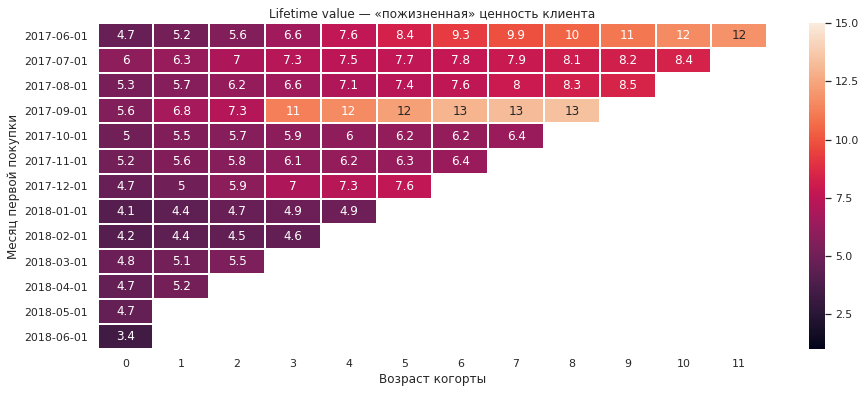

In [54]:
# Визуализируем данные, создав тепловую карту при помощи метода heatmap() 
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Lifetime value — «пожизненная» ценность клиента')
ax = sns.heatmap(cumulative_ltv, annot=True, linewidths=1, linecolor='white', vmin=1, vmax=15)
ax.set_yticklabels(cumulative_ltv.index.date)
ax.set_xlabel('Возраст когорты')
ax.set_ylabel('Месяц первой покупки')
plt.show()

Посчитаем средний LTV за опеределенный период: 3-6-9 месяцев.

In [55]:
# Посчитаем накопительный LTV за 3 месяца после первой покупки
m3_cum_ltv = cumulative_ltv.mean(axis=0)[2]

# Посчитаем накопительный LTV за 6 месяцев после первой покупки
m6_cum_ltv = cumulative_ltv.mean(axis=0)[5]

# Посчитаем накопительный LTV за 9 месяцев после первой покупки
m9_cum_ltv = cumulative_ltv.mean(axis=0)[8]

print('Средний LTV за 3 месяца после первой покупки: {:.2f}'.format(m3_cum_ltv)) 
print('Средний LTV за 6 месяцев после первой покупки: {:.2f}'.format(m6_cum_ltv)) 
print('Средний LTV за 9 месяцев после первой покупки: {:.2f}'.format(m9_cum_ltv)) 

Средний LTV за 3 месяца после первой покупки: 5.82
Средний LTV за 6 месяцев после первой покупки: 7.97
Средний LTV за 9 месяцев после первой покупки: 10.06


При помощи метрики LTV нам удалось более детально рассмотреть финансовую ценность каждой когорты пользователей сервиса Яндекс.Афиша и мы наглядно увидели, что в целом с каждой последующей когортой данный показатель снижается. Причиной этому могут быть, как растущий или падающий средний чек, так и "срок жизни" когорты.  
В очередной раз хочется отдельно отметить когорту сентября, которая показывает аномально высокие показатели - более подробное изучение данной когорты может дать нам подсказку, как работать в отношении менее активных когорт.  

#### 2.9. Анализ маркетинга: общие затраты/на каждый источник/по времени <a id='2.9.'></a>

Оценить, насколько хорошо работает сервис, можно по метрикам пожизненной стоимости клиента (LTV) и всем затратам на привлечение и удержание пользователя. Рассмотрим далее более подробно маркетинговые издержки и найдем в первую очередь общие затраты за весь период с июня 2017 по конец мая 2018 года.

In [56]:
# Найдем общие затраты на маркетинг
print('Общие затраты на маркетинг в период с июня 2017 - по конец мая 2018 составили:', costs['costs'].sum(), 'руб.')

Общие затраты на маркетинг в период с июня 2017 - по конец мая 2018 составили: 329131.62 руб.


Сгруппируем данные по идентификатору рекламного источника и найдем сумму затрат на каждый из них.

In [57]:
# Найдем затраты на каждый из рекламных источников
costs_source_id = costs.groupby('source_id').agg({'costs': 'sum'})
costs_source_id.sort_values(by='costs', ascending=False).reset_index().transpose()

,0,1,2,3,4,5,6
source_id,3.00,4.0,5.0,2.00,1.00,10.00,9.00
costs,141321.63,61073.6,51757.1,42806.04,20833.27,5822.49,5517.49


Почти половина всех затрат приходится на рекламный источник - 3. Наименее затратными являются источники под номерами 10 и 9, на которые приходится менее 2% от всех издержек.

Сгруппируем данные с информацией о затратах по времени и постараемся понять как они менялись в зависимости от периода.

In [58]:
# Выделим месяцы из дат в таблице с затратами 
costs['month'] = costs['dt'].astype('datetime64[M]')

# Найдем затраты в зависимости от периода
monthly_costs = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
monthly_costs.columns = ['month', 'total_costs']
monthly_costs

# Добавим данные о расходах в отчёт 
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new.head(5)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,total_costs
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,18015.0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,2017-06-01,18015.0
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,2017-06-01,18015.0
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,2017-06-01,18015.0
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,2017-06-01,18015.0


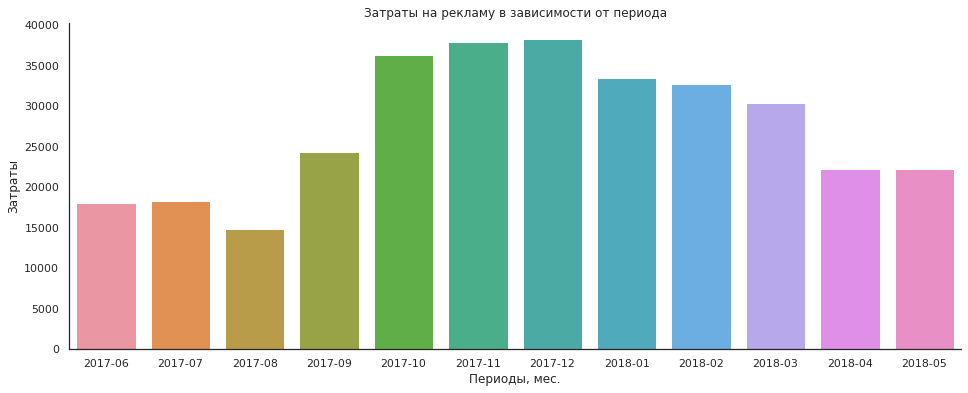

In [59]:
# Визуализируем данные, построив график
monthly_costs['month'] = monthly_costs.index
data_month = ['2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05']

plt.figure(figsize=(16, 6))
ax = sns.barplot(x='month', y='total_costs', data=monthly_costs)
sns.despine()
ax.set_xticklabels(data_month)
plt.title('Затраты на рекламу в зависимости от периода')
ax.set_xlabel('Периоды, мес.')
ax.set_ylabel('Затраты')
plt.show()

Месяцами, которые потребовали наибольших вложений на рекламу, являются - октябрь, ноябрь и декабрь. Более того, в ноябре издержки достигли своего максимума. А вот в августе, наоборот, - наблюдается рекордно низкое вложение средств на рекламу сервиса.

#### 2.10. Анализ маркетинга: стоимость привлечения одного покупателя из каждого источника <a id='2.10.'></a>

Найдем стоимость привлечения одного покупателя, взяв за основу данные о затратах на каждый рекламный источник и количество пользователей по каждому источнику.

In [60]:
# Добавим в новый столбец таблицы значения стоимости привлечения покупателя
report_new['cac'] = report_new['total_costs'] / report_new['n_buyers']
report_new.sample(5)

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,month,total_costs,cac
22,2017-07-01,1923,2018-05-01,299.36,299.36,10,0.155673,2017-07-01,18240.59,9.485486
57,2017-12-01,4383,2017-12-01,20767.49,20767.49,0,4.738191,2017-12-01,38315.35,8.741809
46,2017-10-01,4340,2018-02-01,657.77,657.77,4,0.151560,2017-10-01,36322.88,8.369327
61,2017-12-01,4383,2018-04-01,1371.57,1371.57,4,0.312930,2017-12-01,38315.35,8.741809
5,2017-06-01,2023,2017-11-01,1487.92,1487.92,5,0.735502,2017-06-01,18015.00,8.905091


In [61]:
# Сделаем срез по пользователям, которые впервые проявили активность в сервисе
visits_source_id = visits.query('start_ts == first_activity')

# Найдем для каждого рекламного источника количество пользователей
n_buyers_per_source_id = (orders.merge(visits_source_id, on='uid')).groupby('source_id').agg({'uid': 'nunique'})
n_buyers_per_source_id.rename(columns = {'uid': 'n_buyers'}, inplace = True)

# Объединим n_clients_per_source_id и costs_source_id
cac = n_buyers_per_source_id.join(costs_source_id).fillna(0).reset_index()

# Посчитаем САС
cac['cac'] = cac['costs'] / cac['n_buyers']
cac

,source_id,n_buyers,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10296,61073.60,5.931779
4,5,6931,51757.10,7.467479
5,7,1,0.00,0.000000
6,9,1088,5517.49,5.071222
7,10,1329,5822.49,4.381106


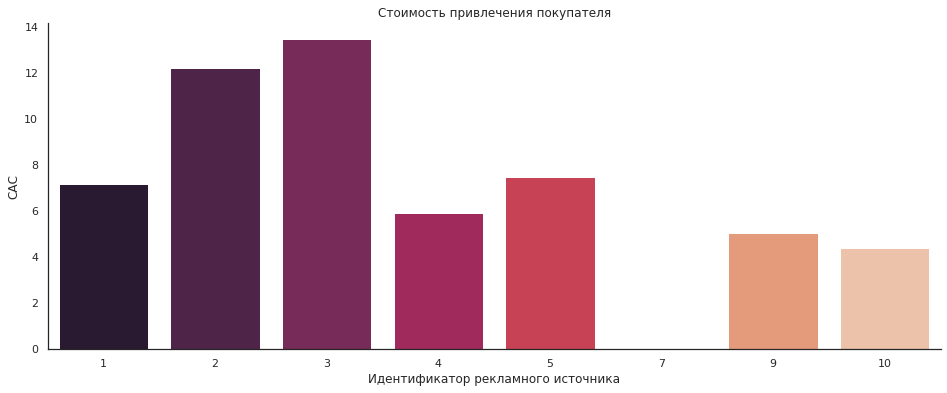

In [62]:
# Визуализируем данные, построив график
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='source_id', y='cac', data=cac, palette="rocket")
sns.despine()
plt.title('Стоимость привлечения покупателя')
ax.set_xlabel('Идентификатор рекламного источника')
ax.set_ylabel('САС')
plt.show()

Подсчитав расходы на привлечение пользователя отдельно по каждому рекламному источнику можем выделить 3 - он хоть и привлек максимум клиентов, но клиент тут самый дорогой, а вот источник 4 привел столько же, но обошлось это дешевле. 
К источникам с наиболее скромными затратами и минимальным количеством привлеченных пользователей отнесем 9 и 10 и совсем нулевыми - 6 и 7 и их желательно развивать, инвестируя больше средств.

#### 2.11. Анализ маркетинга: окупаемость расходов <a id='2.11.'></a>

В данном шаге узнаем, окупаемость вложений на привлечение пользователей в сервис Яндекс.Афиша по когортам.

In [63]:
# Рассчитаем возврат на инвестиции в маркетинге
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

# Построим сводную таблицу с ROMI
final_result = report_new.pivot_table( index='first_order_month', columns='age', values='romi', aggfunc='mean')
final_result = final_result.cumsum(axis=1)
final_result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.530530,0.585030,0.634174,0.741379,0.856205,0.938798,1.045528,1.110838,1.172961,1.240989,1.305138,1.333982
2017-07-01,0.633623,0.668962,0.734697,0.772542,0.791180,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,NaN
2017-08-01,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.740230,0.767297,0.784708,NaN,NaN
2017-09-01,0.597833,0.716200,0.771374,1.192464,1.234889,1.303422,1.377732,1.403485,1.422974,NaN,NaN,NaN
2017-10-01,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.746150,0.759947,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.571800,0.677624,0.799484,0.835281,0.873951,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.445835,0.476455,0.490823,0.497132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.494855,0.503615,0.511887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


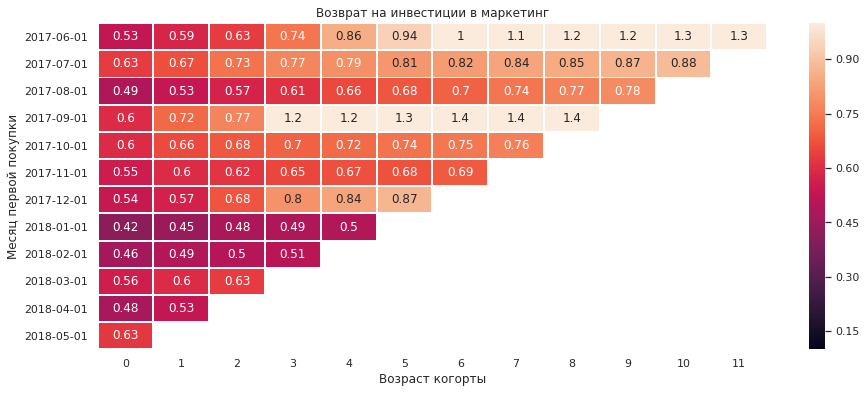

In [64]:
# Визуализируем данные, создав тепловую карту при помощи метода heatmap() 
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Возврат на инвестиции в маркетинг')
ax = sns.heatmap(final_result, annot=True, linewidths=1, linecolor='white', vmin=0.1, vmax=1)
ax.set_yticklabels(final_result.index.date)
ax.set_xlabel('Возраст когорты')
ax.set_ylabel('Месяц первой покупки')
plt.show()

Основываясь на данных отчета выше можно сделать следующие выводы:
* Июньская когорта окупилась на 6-ой месяц (ROMI = 1);
* Сентябрьская когорта окупилась на 3-ий месяц (ROMI = 1.2)

Усреднив метрику ROMI, узнаем как быстро в среднем окупаются когорты.

In [65]:
# Усредним значения каждой колонки и «сложим» таблицу в единую строку
output.cumsum(axis=1).mean(axis=0).round(2).to_frame().T

age,0,1,2,3,4,5,6,7,8,9,10,11
0,0.54,0.58,0.63,0.72,0.78,0.86,0.9,0.97,1.05,0.96,1.09,1.33


Из проделанных расчетов мы видим, что в среднем когорты окупаются к концу 9-го месяца.

Далее рассмотрим распределение выручки в зависимости от используемого пользователем устройства.

In [66]:
# Найдем выручку по каждому источнику, в зависимости от категории устройства
revenue_sourse_id_device = (orders.merge(visits_source_id, on='uid', how='inner')).groupby(['source_id', 'device']).agg({'revenue':'sum'})

revenue_sourse_id_device = revenue_sourse_id_device.reset_index()

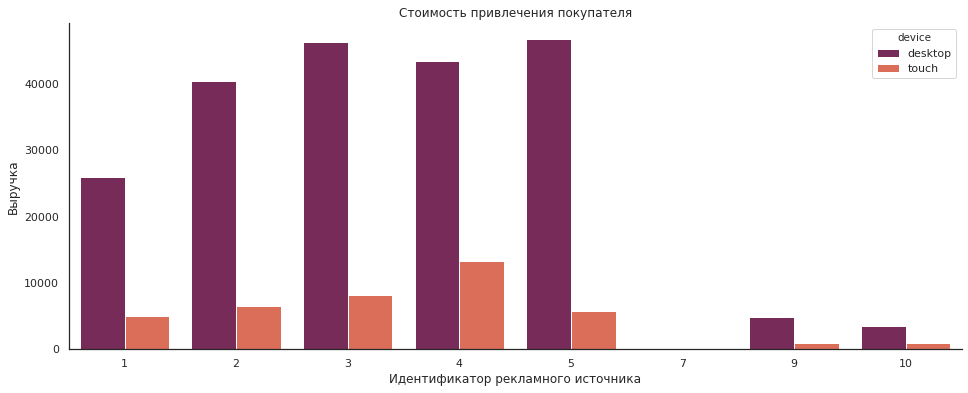

In [67]:
# Визуализируем данные, построив график
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='source_id', y='revenue', hue="device", data=revenue_sourse_id_device, palette="rocket")
sns.despine()
plt.title('Стоимость привлечения покупателя')
ax.set_xlabel('Идентификатор рекламного источника')
ax.set_ylabel('Выручка')
plt.show()

Исходя из проведенного анализа окупаемости издержек на привлечение пользователей, можно увидеть, что крайне эффективный канал 3, наращивая количество новый пользователей и увеличивая расходы, на данный момент еще убыточен, но, возможно, на его окупаемость потребуется какое-то время.  
С другой стороны, источник 1 уже приносит довольно высокий положительный результат окупаемости, отличающийся не самыми высокими издержками.  
Больший перевес по устройству, с которого пользователи заходят на Яндекс.Афишу является персональный компьтер, в то время как, на долю мобильных устройств приходится очень малая часть пользовательских обращений.

### Общий вывод <a id='2.12.'></a>

В ходе проделанной работы были изучены и преобразованы данные, предоставленные сервисом Яндекс.Афиши, проанализированы основные бизнес-показатели и метрики продукта, продаж и маркетинга.  

Количество активных пользователей – один из важнейших показателей продукта. В целом данный сервис имеет положительную динамику притока новых пользователей, в разрезе день/неделя/месяц их количество только увеличивается. Но если более детально посмотреть на коэффициент удержания этих пользователей, то он изначально довольно низкий и с течением времени только снижается, что говорит о малой привлекательности сервиса в перспективе. В большинстве случаев пользователи проводят на Яндекс.Афише не более 1 минуты, за которую успевают ознакомиться с мероприятиями, сделать выбор или приобрести билет.  
Посмотрев более детально на продажи становится понятно, что в среднем пользователи совершают 2 покупки в месяц и тратят на билеты от 3420 - до почти 5850 рублей, в зависимости от месяца. Так, наибольший средний чек наблюдается в декабре, наименьший - в июне.  
Финансовая ценность каждой когорты пользователей сервиса Яндекс.Афиша с каждой последующей когортой - снижается. Причиной этому могут быть, как растущий или падающий средний чек, так и "срок жизни" когорты.  

Рекламный источник, требующий наибольших вложений (примерно 50% от всех затрат) - 3. Вместе с тем, он является и самым убыточным. Возможно, на его окупаемость потребуется какое-то время, а, возможно, и вовсе стоит пересмотреть маркетинговую стратегию в сторону другого источника. По 2 и 4 каналам также необходимо провести дополнительные исследования и выяснить причины настолько низкой конверсии в покупателя, т.к. на них также приходятся высокие издержки.  

Уже сейчас мы можем с уверенность сказать, что июньская когорта окупится к 6-ому месяцу, а сентябрьская - к 3-ему.

Отдельно хочется уделить внимание тому, как распределяются пользователи ресурса по устройствам: большая часть визитов производится с персонального компьютера и совсем незначительная - с мобильных устройств. Это довольно сильный перевес в пользу ПК, особенно учитывая современные тренды, когда всё можно сделать через телефон. 

Подведем итог - придерживаться текущей маркетинговой стратегии не стоит. За год было собрано достаточно данных для разработки новой стратегии развития. Необходимо провести все необходимые исследования, сформулировать её и применить.